In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Automatically created module for IPython interactive environment


In [3]:
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

In [4]:
colors = ['red', 'green', 'blue', 'orange']

In [5]:
#dataset2
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data3_income census/adult.csv')
#age: numeric
#fnlwgt: numeric
#delete education because education number is repeating to this feature
#education_num: numeric
#capital_gain:numeric
#capital_loss:numeric
#hours_per_week:numeric
#native_country: has too many non-numeric values, delete
data=raw_data
data.drop
data['age']=raw_data.age
data['age']=data.age.astype(int)
data['fnlwgt']=raw_data.fnlwgt
data['fnlwgt']=data.fnlwgt.astype(int)
data['education_num']=raw_data.education_num
data['education_num']=data.education_num.astype(int)
data['capital_gain']=raw_data.capital_gain
data['capital_gain']=data.capital_gain.astype(int)
data['capital_loss']=raw_data.capital_loss
data['capital_loss']=data.capital_loss.astype(int)
data['hours_per_week']=raw_data.hours_per_week
data['hours_per_week']=data.hours_per_week.astype(int)

#convert workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
raw_data['workclass'] = raw_data.workclass.str.replace('Without-pay','0')
raw_data['workclass'] = raw_data.workclass.str.replace('Never-worked','1')
raw_data['workclass'] = raw_data.workclass.str.replace('Private','2')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-not-inc','3')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-inc','4')
raw_data['workclass'] = raw_data.workclass.str.replace('Federal-gov','5')
raw_data['workclass'] = raw_data.workclass.str.replace('Local-gov','6')
raw_data['workclass'] = raw_data.workclass.str.replace('State-gov','7')
raw_data['workclass'] = raw_data.workclass.str.replace('?','8')

data['workclass']=raw_data.workclass
data['workclass']=data.workclass.astype(int)

#convert marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse 
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-civ-spouse','0')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Divorced','1')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Never-married','2')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Separated','3')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Widowed','4')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-spouse-absent','5')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-AF-spouse','6')
data['marital_status']=raw_data.marital_status
data['marital_status']=data.marital_status.astype(int)

#convert occupation:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, 
#Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, 
#Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, 
#Armed-Forces
raw_data['occupation'] = raw_data.occupation.str.replace('Tech-support','0')
raw_data['occupation'] = raw_data.occupation.str.replace('Craft-repair','1')
raw_data['occupation'] = raw_data.occupation.str.replace('Other-service','2')
raw_data['occupation'] = raw_data.occupation.str.replace('Sales','3')
raw_data['occupation'] = raw_data.occupation.str.replace('Exec-managerial','4')
raw_data['occupation'] = raw_data.occupation.str.replace('Prof-specialty','5')
raw_data['occupation'] = raw_data.occupation.str.replace('Handlers-cleaners','6')
raw_data['occupation'] = raw_data.occupation.str.replace('Machine-op-inspct','7')
raw_data['occupation'] = raw_data.occupation.str.replace('Adm-clerical','8')
raw_data['occupation'] = raw_data.occupation.str.replace('Farming-fishing','9')
raw_data['occupation'] = raw_data.occupation.str.replace('Transport-moving','10')
raw_data['occupation'] = raw_data.occupation.str.replace('Priv-house-serv','11')
raw_data['occupation'] = raw_data.occupation.str.replace('Protective-serv','12')
raw_data['occupation'] = raw_data.occupation.str.replace('Armed-Forces','13')
raw_data['occupation'] = raw_data.occupation.str.replace('?','14')

data['occupation']=raw_data.occupation
data['occupation']=data.occupation.astype(int)

#relationship:Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
raw_data['relationship'] = raw_data.relationship.str.replace('Wife','0')
raw_data['relationship'] = raw_data.relationship.str.replace('Own-child','1')
raw_data['relationship'] = raw_data.relationship.str.replace('Husband','2')
raw_data['relationship'] = raw_data.relationship.str.replace('Not-in-family','3')
raw_data['relationship'] = raw_data.relationship.str.replace('Other-relative','4')
raw_data['relationship'] = raw_data.relationship.str.replace('Unmarried','5')
data['relationship']=raw_data.relationship
data['relationship']=data.relationship.astype(int)

#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
raw_data['race'] = raw_data.race.str.replace('White','0')
raw_data['race'] = raw_data.race.str.replace('Asian-Pac-Islander','1')
raw_data['race'] = raw_data.race.str.replace('Amer-Indian-Eskimo','2')
raw_data['race'] = raw_data.race.str.replace('Other','3')
raw_data['race'] = raw_data.race.str.replace('Black','4')
data['race']=raw_data.race
data['race']=data.race.astype(int)

#sex: Female, Male
raw_data['sex'] = raw_data.sex.str.replace('Female','0')
raw_data['sex'] = raw_data.sex.str.replace('Male','1')
data['sex']=raw_data.sex
data['sex']=data.sex.astype(int)

#set label_name column
data['income_name'] = raw_data.income

#income: >50K, <=50K
raw_data['income'] = raw_data.income.str.replace('>50K','1')
raw_data['income'] = raw_data.income.str.replace('<=50K','0')
raw_data['income'] = raw_data.income
raw_data['income'] = raw_data.income.astype(int)
data.head()

datalist_label = data.income
datalist_names = data.income_name
datalist_label_names = np.array(['>50K','<=50K'])
datalist = data.drop(['fnlwgt','education','native_country','income','income_name'], axis=1)
datalist_array = datalist.values
datalist_array

array([[   39,     7,    13, ...,  2174,     0,    40],
       [   50,     3,    13, ...,     0,     0,    13],
       [   38,     2,     9, ...,     0,     0,    40],
       ..., 
       [   58,     2,     9, ...,     0,     0,    40],
       [   22,     2,     9, ...,     0,     0,    20],
       [   52,     4,     9, ..., 15024,     0,    40]])

In [6]:
datalist.describe()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.028715,10.080679,1.077485,5.259636,2.380854,0.459752,0.669205,1077.648844,87.303830,40.437456
std,13.640433,1.865273,2.572720,1.185543,3.596131,1.237468,1.211933,0.470506,7385.292085,402.960219,12.347429
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,2.000000,9.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,2.000000,10.000000,1.000000,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,3.000000,12.000000,2.000000,8.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000


In [7]:
# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(datalist_array, datalist_label)))
X_train = datalist_array[train_index]
y_train = datalist_label[train_index]
X_test = datalist_array[test_index]
y_test = datalist_label[test_index]

n_classes = len(np.unique(y_train))
n_classes

2

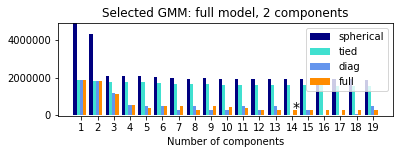

In [8]:
#Get the best K
import itertools
from scipy import linalg
import matplotlib as mpl

from sklearn import mixture

# Number of samples per component
#n_samples = 500

# Generate random sample, two components
#np.random.seed(0)
#C = np.array([[0., -0.1], [1.7, .4]])
#X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#         .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

lowest_bic = np.infty
bic = []
n_components_range = range(1, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_train)
        bic.append(gmm.bic(X_train))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

plt.xticks()
plt.yticks()
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.7, bottom=0.01)
plt.show()

In [9]:
#full, K= 17
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_name
0,39,7,77516,Bachelors,13,2,8,3,0,1,2174,0,40,United-States,0,<=50K
1,50,3,83311,Bachelors,13,0,4,2,0,1,0,0,13,United-States,0,<=50K
2,38,2,215646,HS-grad,9,1,6,3,0,1,0,0,40,United-States,0,<=50K
3,53,2,234721,11th,7,0,6,2,4,1,0,0,40,United-States,0,<=50K
4,28,2,338409,Bachelors,13,0,5,0,4,0,0,0,40,Cuba,0,<=50K


In [10]:
new_component=2
cv_type='diag'
# Try GMMs with different K
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(datalist_array)
datalist_pred = gmm.predict(datalist_array)
data['K2_label']=datalist_pred

datalist_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
#compare labels 

tb1 = pd.crosstab(data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1
income_name,,
<=50K,24720,0
>50K,7682,159


In [12]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_name,K2_label
0,39,7,77516,Bachelors,13,2,8,3,0,1,2174,0,40,United-States,0,<=50K,0
1,50,3,83311,Bachelors,13,0,4,2,0,1,0,0,13,United-States,0,<=50K,0
2,38,2,215646,HS-grad,9,1,6,3,0,1,0,0,40,United-States,0,<=50K,0
3,53,2,234721,11th,7,0,6,2,4,1,0,0,40,United-States,0,<=50K,0
4,28,2,338409,Bachelors,13,0,5,0,4,0,0,0,40,Cuba,0,<=50K,0


In [13]:
#assign test K=2 label
def em_K1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
data['K2_label_name']=data['K2_label'].apply(em_K1_label)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_name,K2_label,K2_label_name
0,39,7,77516,Bachelors,13,2,8,3,0,1,2174,0,40,United-States,0,<=50K,0,<=50K
1,50,3,83311,Bachelors,13,0,4,2,0,1,0,0,13,United-States,0,<=50K,0,<=50K
2,38,2,215646,HS-grad,9,1,6,3,0,1,0,0,40,United-States,0,<=50K,0,<=50K
3,53,2,234721,11th,7,0,6,2,4,1,0,0,40,United-States,0,<=50K,0,<=50K
4,28,2,338409,Bachelors,13,0,5,0,4,0,0,0,40,Cuba,0,<=50K,0,<=50K


In [14]:
K2_accuracy = len(data[data['income_name']==data['K2_label_name']])/len(data)
print('K=2 EM -> {0:.4f}%'.format(K2_accuracy*100))

K=2 EM -> 76.4074%


In [15]:
#K=17
new_component=17
cv_type='full'
# Try GMMs with different K
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(datalist_array)
datalist_pred = gmm.predict(datalist_array)
data['K17_label']=datalist_pred

datalist_pred

array([15,  5,  1, ...,  1,  1,  0], dtype=int64)

In [16]:
#compare labels 

tb1 = pd.crosstab(data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
income_name,,,,,,,,,,,,,,,,,
<=50K,0,17026,0,0,0,6284,746,0,0,15,5,41,43,83,0,475,2
>50K,346,1621,159,107,34,4438,773,43,39,0,0,20,3,51,15,192,0


In [17]:
#assign test K=17 label
data['K17_label_name']=data['K17_label'].apply(em_K1_label)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,income_name,K2_label,K2_label_name,K17_label,K17_label_name
0,39,7,77516,Bachelors,13,2,8,3,0,1,2174,0,40,United-States,0,<=50K,0,<=50K,15,<=50K
1,50,3,83311,Bachelors,13,0,4,2,0,1,0,0,13,United-States,0,<=50K,0,<=50K,5,<=50K
2,38,2,215646,HS-grad,9,1,6,3,0,1,0,0,40,United-States,0,<=50K,0,<=50K,1,<=50K
3,53,2,234721,11th,7,0,6,2,4,1,0,0,40,United-States,0,<=50K,0,<=50K,1,<=50K
4,28,2,338409,Bachelors,13,0,5,0,4,0,0,0,40,Cuba,0,<=50K,0,<=50K,1,<=50K


In [18]:
K17_accuracy = len(data[data['income_name']==data['K17_label_name']])/len(data)
print('K=17 EM -> {0:.4f}%'.format(K17_accuracy*100))

K=17 EM -> 78.2838%


In [19]:
scanK = pd.DataFrame(data=datalist_label[0:],
                   columns=['income'])
scanK['income_name'] =data.income_name
scanK.head()

,income,income_name
0,0,<=50K
1,0,<=50K
2,0,<=50K
3,0,<=50K
4,0,<=50K


In [20]:
#for loop for EM K 
# Try GMMs with different K

for i in range(1,100):
    new_component=i
    cv_type='full'
    gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
    gmm.fit(datalist_array)
    datalist_pred = gmm.predict(datalist_array)
    scanK['Ki_label']=datalist_pred
    tb1 = pd.crosstab(scanK['income_name'],datalist_pred)
    scanK['Ki_label_name']=scanK['Ki_label'].apply(em_K1_label)

    Ki_accuracy = len(scanK[scanK['income_name']==scanK['Ki_label_name']])/len(scanK)
    print('K=',i,' EM -> {0:.4f}%'.format(Ki_accuracy*100))

K= 1  EM -> 75.9190%
K= 2  EM -> 76.4074%
K= 3  EM -> 76.4903%
K= 4  EM -> 77.9736%
K= 5  EM -> 76.4903%
K= 6  EM -> 76.5210%
K= 7  EM -> 79.3004%
K= 8  EM -> 78.8274%
K= 9  EM -> 77.7249%
K= 10  EM -> 79.5154%
K= 11  EM -> 79.4263%
K= 12  EM -> 77.3625%
K= 13  EM -> 77.3625%
K= 14  EM -> 78.2071%
K= 15  EM -> 79.2328%
K= 16  EM -> 78.9196%
K= 17  EM -> 79.6966%
K= 18  EM -> 79.0393%
K= 19  EM -> 80.2709%
K= 20  EM -> 79.9545%
K= 21  EM -> 80.3200%
K= 22  EM -> 79.9699%
K= 23  EM -> 80.7008%
K= 24  EM -> 80.7070%
K= 25  EM -> 80.7254%
K= 26  EM -> 80.9127%
K= 27  EM -> 80.8175%
K= 28  EM -> 80.8974%
K= 29  EM -> 80.9680%
K= 30  EM -> 81.0694%
K= 31  EM -> 80.6886%
K= 32  EM -> 81.0632%
K= 33  EM -> 81.1953%
K= 34  EM -> 81.0264%
K= 35  EM -> 80.9312%
K= 36  EM -> 81.0602%
K= 37  EM -> 80.8820%
K= 38  EM -> 81.4226%
K= 39  EM -> 81.0540%
K= 40  EM -> 81.1769%
K= 41  EM -> 81.5454%
K= 42  EM -> 81.3181%
K= 43  EM -> 81.3611%
K= 44  EM -> 81.1554%
K= 45  EM -> 81.1185%
K= 46  EM -> 81.115